  Bitcoin has often been referred to as the gold of the internet.  It's not hard to perceive why, the similarities between the two are striking.  Both have monetary characteristics and history, both have a finite supply, both are currently used as a store of value by investors, and both are seen as alternative investments on wall street.  Despite all the similarities it's worth it to take a closer look at the data available to us to see whether the similarities dive deeper than surface level.
  To aid in this speculatory comparison I've downloaded 2 data sets from the FRED data service of the Federal Reserve Bank of St. Louis.  The data sets show the price of gold per troy ounce over time and the price of a Bitcoin over time.
  I believe the the prices of these commodities over time will offer insights into such queries as:  Can Bitcoin really be compared to gold?  Can the history of gold help us predict the future of Bitcoin?  Or is there any coorelation between the price movements in gold and the price movements in Bitcoin?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load CSV files
btc=pd.read_csv('BTC.csv')
gold=pd.read_csv('GOLD.csv')

In [3]:
print(btc)

            DATE  CBBTCUSD
0     2014-12-01       370
1     2014-12-02       378
2     2014-12-03       378
3     2014-12-04     377.1
4     2014-12-05         .
...          ...       ...
1754  2019-09-20  10168.44
1755  2019-09-21   9982.39
1756  2019-09-22   10035.0
1757  2019-09-23   9683.89
1758  2019-09-24   8556.43

[1759 rows x 2 columns]


In [4]:
print(gold)

             DATE GOLDAMGBD228NLBM
0      1968-04-01           38.000
1      1968-04-02           37.600
2      1968-04-03           37.700
3      1968-04-04           36.700
4      1968-04-05           37.200
...           ...              ...
13427  2019-09-18          1502.20
13428  2019-09-19          1498.40
13429  2019-09-20          1504.10
13430  2019-09-23          1519.50
13431  2019-09-24          1520.25

[13432 rows x 2 columns]


In [5]:
btc.dtypes

DATE        object
CBBTCUSD    object
dtype: object

In [6]:
gold.dtypes

DATE                object
GOLDAMGBD228NLBM    object
dtype: object

  After looking at the data and attempting a few things, it will take some structuring to get the data into a workable set.  We have some empty values in price and all the data is presented as an object.

In [7]:
#Rename columns for easier recall
gold.columns=('date', 'price_gold')
btc.columns=('date', 'price_btc')

#Reclassify data to strings
gold['price_gold'] = gold['price_gold'].astype(str)
btc['price_btc'] = btc['price_btc'].astype(str)

#Remove empty values of both data sets
emptyvaluesgold = gold[gold['price_gold'] == '.'].index
gold.drop(emptyvaluesgold, inplace=True)

empty_values_btc = btc[btc['price_btc'] == '.'].index
btc.drop(empty_values_btc, inplace=True)

#Bring the price back to a float and round to 2 decimal places
gold['price_gold'] = gold['price_gold'].astype(float)
btc['price_btc'] = btc['price_btc'].astype(float)

gold.price_gold = gold.price_gold.round(2)
btc.price_btc = btc.price_btc.round(2)

In [8]:
print(btc)

            date  price_btc
0     2014-12-01     370.00
1     2014-12-02     378.00
2     2014-12-03     378.00
3     2014-12-04     377.10
5     2014-12-06     378.00
...          ...        ...
1754  2019-09-20   10168.44
1755  2019-09-21    9982.39
1756  2019-09-22   10035.00
1757  2019-09-23    9683.89
1758  2019-09-24    8556.43

[1725 rows x 2 columns]


In [9]:
print(gold)

             date  price_gold
0      1968-04-01       38.00
1      1968-04-02       37.60
2      1968-04-03       37.70
3      1968-04-04       36.70
4      1968-04-05       37.20
...           ...         ...
13427  2019-09-18     1502.20
13428  2019-09-19     1498.40
13429  2019-09-20     1504.10
13430  2019-09-23     1519.50
13431  2019-09-24     1520.25

[13018 rows x 2 columns]


In [10]:
#Remove day of the month, so that date reads year-month
gold.date = gold.date.str[0:7]
btc.date = btc.date.str[0:7]

#Group by year-month and take the average of the price
gold_monthly_avg = gold.groupby('date', as_index=False)['price_gold'].mean()
btc_monthly_avg = btc.groupby('date', as_index=False)['price_btc'].mean()

#Round the price to 2 decimal places
gold_monthly_avg.price_gold = gold_monthly_avg.price_gold.round(2)
btc_monthly_avg.price_btc = btc_monthly_avg.price_btc.round(2)

#Convert date from string to date_time
gold_monthly_avg['date'] = pd.to_datetime(gold_monthly_avg['date'])
btc_monthly_avg['date'] = pd.to_datetime(btc_monthly_avg['date'])

In [11]:
print(gold_monthly_avg)

          date  price_gold
0   1968-04-01       37.88
1   1968-05-01       40.69
2   1968-06-01       41.11
3   1968-07-01       39.53
4   1968-08-01       39.17
..         ...         ...
613 2019-05-01     1283.10
614 2019-06-01     1358.49
615 2019-07-01     1414.61
616 2019-08-01     1497.10
617 2019-09-01     1511.49

[618 rows x 2 columns]


In [12]:
print(btc_monthly_avg)

         date  price_btc
0  2014-12-01     367.40
1  2015-01-01     228.33
2  2015-02-01     234.99
3  2015-03-01     270.12
4  2015-04-01     236.22
5  2015-05-01     237.43
6  2015-06-01     238.42
7  2015-07-01     280.38
8  2015-08-01     251.76
9  2015-09-01     234.37
10 2015-10-01     266.23
11 2015-11-01     349.51
12 2015-12-01     424.61
13 2016-01-01     410.63
14 2016-02-01     403.36
15 2016-03-01     414.70
16 2016-04-01     436.09
17 2016-05-01     463.50
18 2016-06-01     644.59
19 2016-07-01     663.49
20 2016-08-01     580.12
21 2016-09-01     606.09
22 2016-10-01     642.48
23 2016-11-01     725.57
24 2016-12-01     825.52
25 2017-01-01     914.54
26 2017-02-01    1069.04
27 2017-03-01    1131.95
28 2017-04-01    1221.79
29 2017-05-01    1903.21
30 2017-06-01    2618.02
31 2017-07-01    2510.73
32 2017-08-01    3873.75
33 2017-09-01    4108.79
34 2017-10-01    5351.12
35 2017-11-01    7791.36
36 2017-12-01   15271.37
37 2018-01-01   12926.83
38 2018-02-01    9382.84


  Now that both data sets seem to be in a manageable working order let's compare the data visually side by side.

/Users/jmp/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


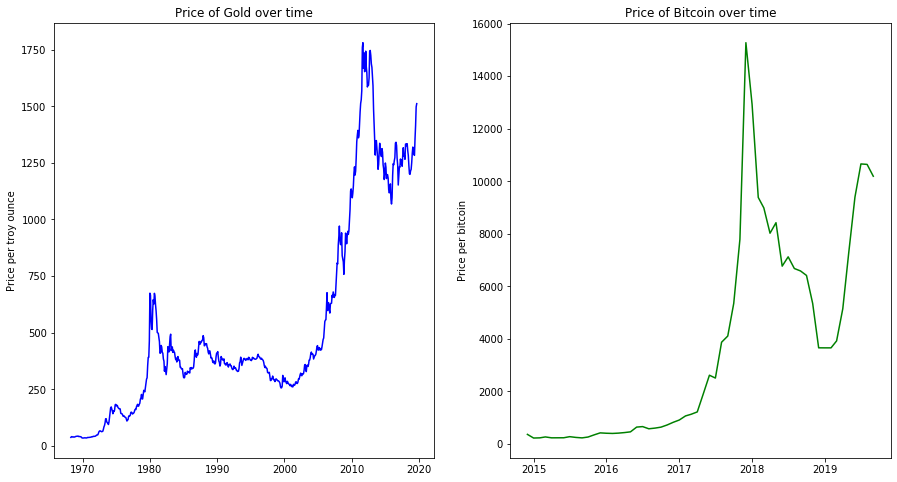

In [13]:
#Plot data for comparison
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
plt.plot(gold_monthly_avg.date, gold_monthly_avg.price_gold, color='blue')
plt.ylabel('Price per troy ounce')
plt.title('Price of Gold over time')

plt.subplot(1,2,2)
plt.plot(btc_monthly_avg.date, btc_monthly_avg.price_btc, color='green')
plt.ylabel('Price per bitcoin')
plt.title('Price of Bitcoin over time')

plt.show()

  Looking at this graph it looks like both Bitcoin and gold are prone to large rallies in price over shorter periods of time and between those rallies we have much volatility in price.  Because we have such a large dataset for gold that spans over a much larger period of time than Bitcoin's dataset, I'd like to compare the behavior of gold and Bitcoin together in the same timeline and I'd also like to look at Bitcoin's current behavior versus gold's past behavior during it's first rally to $750 per ounce.

In [14]:
#Slice gold's dataset to compare in time with Bitcoin price
gold_in_dates_of_btc = gold_monthly_avg.date>='2014-12-01'
gold_in_btc_timeline = gold_monthly_avg.loc[gold_in_dates_of_btc]

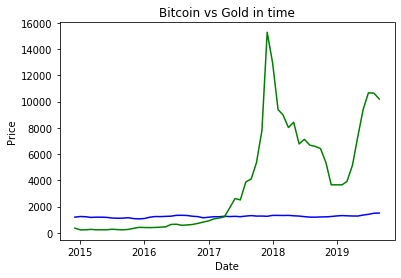

In [15]:
#Plot data in single frame
plt.plot(gold_in_btc_timeline.date, gold_in_btc_timeline.price_gold, color = 'blue')
plt.plot(btc_monthly_avg.date, btc_monthly_avg.price_btc, color = 'green')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Bitcoin vs Gold in time')
plt.show()

  Looking at this graph it seems as if gold's price has remained relatively stagnant, but Bitcoin has had it's first big rally.  If we look at gold's original graph during this time period it seems as if gold did have a rally during this period but because of Bitcoin's exponential increase in price, we're not really seeing it.  I'd like to adjust the scale so that the high's are set to a value of 1 and add gold's data from 2010 (what seems to be it's second large rally, then we can compare the datasets and see if they move in tandem. 

In [16]:
#Find max price of Bitcoin
btc_monthly_avg.price_btc.max()

15271.37

In [17]:
#Find max price of gold in this timeframe
gold_in_btc_timeline.price_gold.max()

1511.49

In [18]:
#Slice gold's dataset again and take data from 2010
gold_in_adjusted = gold_monthly_avg.date>='2010-01-01'
gold_in_adjusted_timeline = gold_monthly_avg.loc[gold_in_adjusted]

In [19]:
#Adjust the prices of the data frame so the high is 1
btc_monthly_avg['adjusted_btc'] = btc_monthly_avg.apply(lambda row:row.price_btc/15271.37, axis=1)
gold_in_adjusted_timeline['adjusted_gold'] = gold_in_adjusted_timeline.apply(lambda row:row.price_gold/1511.49, axis=1)

/Users/jmp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


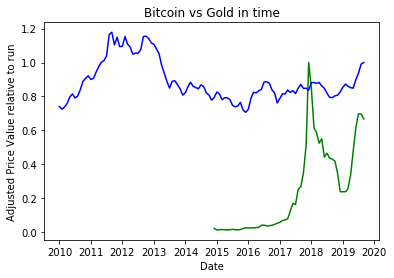

In [20]:
#Plot data in single frame
plt.plot(btc_monthly_avg.date, btc_monthly_avg.adjusted_btc, color = 'green')
plt.plot(gold_in_adjusted_timeline.date, gold_in_adjusted_timeline.adjusted_gold, color = 'blue')
plt.ylabel('Adjusted Price Value relative to run')
plt.xlabel('Date')
plt.title('Bitcoin vs Gold in time')
plt.show()

  So in the entire timeline of the dataset we have on Bitcoin, the value of gold has been stable near the top of it's "second rally".  Since this is in the early creation of Bitcoin let's compare it to gold's first large rally in price.

In [21]:
#Slice gold's dataset again and take data defining first price rally
date_of_first_gold_bubble = gold_monthly_avg.date<='1985-01-01'
golds_first_bubble = gold_monthly_avg.loc[date_of_first_gold_bubble]

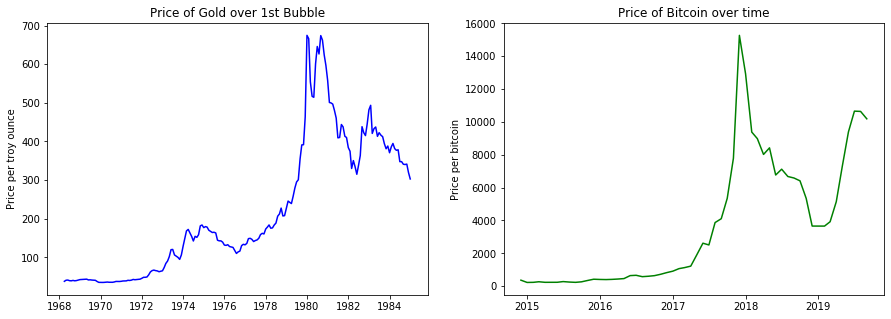

In [22]:
#Plot data for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(golds_first_bubble.date, golds_first_bubble.price_gold, color='blue')
plt.ylabel('Price per troy ounce')
plt.title('Price of Gold over 1st Bubble')

plt.subplot(1,2,2)
plt.plot(btc_monthly_avg.date, btc_monthly_avg.price_btc, color='green')
plt.ylabel('Price per bitcoin')
plt.title('Price of Bitcoin over time')

plt.show()

In [23]:
#Find the top value in price for this rally
golds_first_bubble.price_gold.max()

674.58

In [24]:
#Adjust the prices of the new gold data frame so the high is 1
golds_first_bubble['adjusted_gold'] = golds_first_bubble.apply(lambda row:row.price_gold/674.58, axis=1)

/Users/jmp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


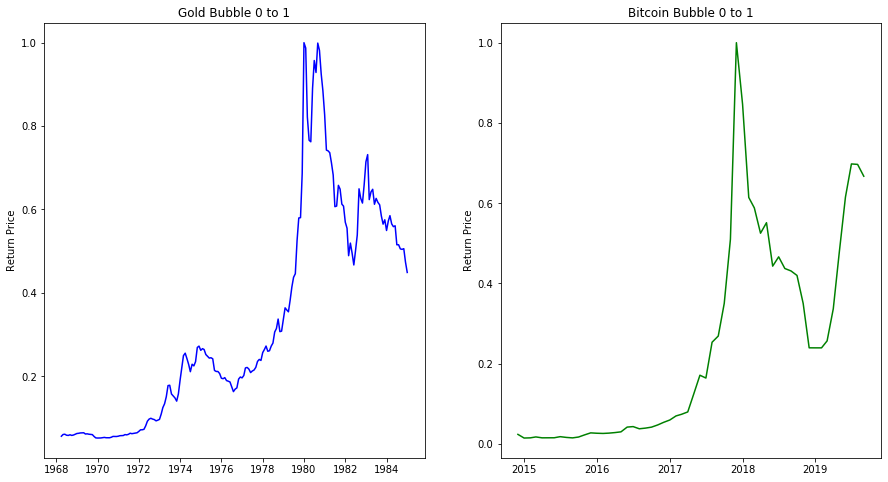

In [25]:
#Plot data for comparison
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
plt.plot(golds_first_bubble.date, golds_first_bubble.adjusted_gold, color='blue')
plt.ylabel('Return Price')
plt.title('Gold Bubble 0 to 1')

plt.subplot(1,2,2)
plt.plot(btc_monthly_avg.date, btc_monthly_avg.adjusted_btc, color='green')
plt.ylabel('Return Price')
plt.title('Bitcoin Bubble 0 to 1')

plt.show()

  Here instead of plotting both datasets in one graph I plotted them next to each other because of the different timelines.  Side by side they look very similar, and that theere could be some relation here.  Let's look at the data in one frame.

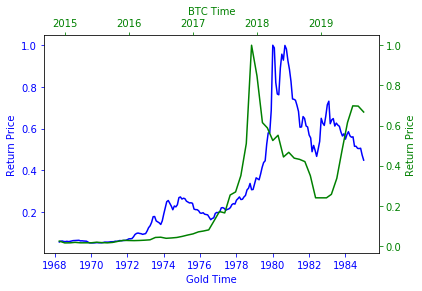

In [26]:
#Plot data in same figure
##Define figure and plots
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

#Define gold plot
ax.plot(golds_first_bubble.date, golds_first_bubble.adjusted_gold, color='blue')
ax.set_xlabel("Gold Time", color='blue')
ax.set_ylabel("Return Price", color='blue')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='blue')

#Define Bitcoin plot
ax2.plot(btc_monthly_avg.date, btc_monthly_avg.adjusted_btc, color='green')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('BTC Time', color='green') 
ax2.set_ylabel('Return Price', color='green')       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors='green')
ax2.tick_params(axis='y', colors='green')

plt.show()

  The graphs are very similar, but the timeframe for Bitcoin is much shorter than that of gold.  A possible reason for that could be because we're living in the age of technology and everything moves at a much quicker pace than it did in the 60's and 70's.  Let's take a look at the distribution of these 2 datasets and some of the statistics and see how they relate.

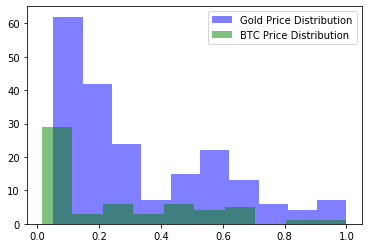

In [27]:
#Show data distribution
plt.hist(golds_first_bubble.adjusted_gold, color='blue', alpha=0.5, label='Gold Price Distribution') 
plt.hist(btc_monthly_avg.adjusted_btc, color='green', alpha=0.5, label='BTC Price Distribution') 
plt.legend(loc='upper right') 
plt.show()

In [28]:
def summary_stats(x):
    print(np.mean(x))
    print(np.var(x, ddof=1))
    print(np.std(x, ddof=1))

In [29]:
summary_stats(golds_first_bubble.adjusted_gold)

0.32190781561479104
0.06649236723048761
0.25786113943455613


In [30]:
summary_stats(btc_monthly_avg.adjusted_btc)

0.24056403674281376
0.06603272015685771
0.25696832520148805


  The histograms show that both datasets are positively skewed.  The gold price distribution across the board shows a good distance above the Bitcoin price distribution,and this makes sense because the gold dataset has more data points.  Beyond that the data is skewed in a similar fashion.
  The mean of this data won't tell us too much, but the fact that the deviation and variance of both data sets are nearly identical shows that the data is distributed in a similar fashion, which is in agreement with the histogram visual.
  Seeing how closely Bitcoin resembles gold's first rally leads one to believe that Bitcoin can in fact compare to gold.  Bitcoin is of course still a young technology/commodity but if it continue's to act in a similar fashion to gold's history it's probable that we could see another large rally in the coming years.
  Looking at the first visual it took gold 10 years to reach that first all time high, where as it took Bitcoin 3 years for that same achievement.  It then took gold 30 years to reach the levels of it's next rally, if the pattern and history repeats itself with Bitcoin it could see it's next big rally in 8-10 years.